#### *File 2 of 4*

<img src="https://bit.ly/2VnXWr2" width="80" align="left"/>

*Ironhack Data Analytics Bootcamp*
<br>
October 2021

<br>

### Mini Project – **The Linear Regression Challenge: Diamonds Price Prediction 💎🤑🏷**

Authors:

* **Natália Mendes Ceoldo** ▫︎ [GitHub](https://github.com/natmceoldo) ▫︎ [LinkedIn](https://www.linkedin.com/in/natmceoldo/)

* **Felipe Altermann** ▫︎ [GitHub](https://github.com/fealt) ▫︎ [LinkedIn](https://www.linkedin.com/in/felipealtermann/)


--------

In [1]:
# importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Analysis – exploring dataset

In [3]:
# reading hist_diamonds .csv file and transform into a data frame

In [4]:
df_hist = pd.read_csv("data/hist_diamonds.csv")
df_hist

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [5]:
# checking if there are any null values
df_hist.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Checking the basic statistics

In [6]:
df_hist.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48940.0,0.797817,0.474126,0.2,0.40,0.70,1.04,5.01
depth,48940.0,61.751931,1.430026,43.0,61.00,61.80,62.50,79.00
table,48940.0,57.451161,2.233450,43.0,56.00,57.00,59.00,95.00
price,48940.0,3934.409644,3989.333861,326.0,949.00,2401.00,5331.25,18823.00
x,48940.0,5.730712,1.121920,0.0,4.71,5.69,6.54,10.74
y,48940.0,5.734333,1.145344,0.0,4.72,5.71,6.54,58.90
z,48940.0,3.538648,0.706817,0.0,2.91,3.52,4.04,31.80


In [7]:
# there are zero values in the 'min' values, let's check how many

In [8]:
len(df_hist.loc[(df_hist["x"] == 0) | (df_hist["y"] == 0) | (df_hist["z"] == 0)])

18

In [9]:
# only 18 of 49k lines have zero values

## Drop those 18 lines with x, y or z columns with zero values

In [10]:
df_hist.loc[(df_hist["x"] == 0) | (df_hist["y"] == 0) | (df_hist["z"] == 0)]
df_hist = df_hist[(df_hist[["x", "y", "z"]] != 0).all(axis=1)].reset_index()
df_hist = df_hist.drop("index", axis=1)

In [11]:
# double check if lines have been dropped

In [12]:
df_hist.shape

(48922, 10)

In [13]:
# double check if we have now a min value not equal to zero

In [14]:
df_hist.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48922.0,0.797555,0.473880,0.20,0.40,0.70,1.04,5.01
depth,48922.0,61.752073,1.429728,43.00,61.00,61.80,62.50,79.00
table,48922.0,57.450856,2.232974,43.00,56.00,57.00,59.00,95.00
price,48922.0,3932.350660,3986.887437,326.00,949.00,2400.00,5331.00,18823.00
x,48922.0,5.731132,1.119630,3.73,4.71,5.69,6.54,10.74
y,48922.0,5.734633,1.143415,3.68,4.72,5.71,6.54,58.90
z,48922.0,3.539950,0.703679,1.07,2.91,3.52,4.04,31.80


## Checking correlations

In [15]:
corr = df_hist.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.027092,0.181719,0.922176,0.977868,0.951946,0.959690
depth,0.027092,1.000000,-0.297033,-0.012135,-0.025740,-0.029781,0.094321
table,0.181719,-0.297033,1.000000,0.127936,0.196034,0.184010,0.152091
price,0.922176,-0.012135,0.127936,1.000000,0.887895,0.866545,0.867529
x,0.977868,-0.025740,0.196034,0.887895,1.000000,0.972691,0.974121
y,0.951946,-0.029781,0.184010,0.866545,0.972691,1.000000,0.953638
z,0.959690,0.094321,0.152091,0.867529,0.974121,0.953638,1.000000


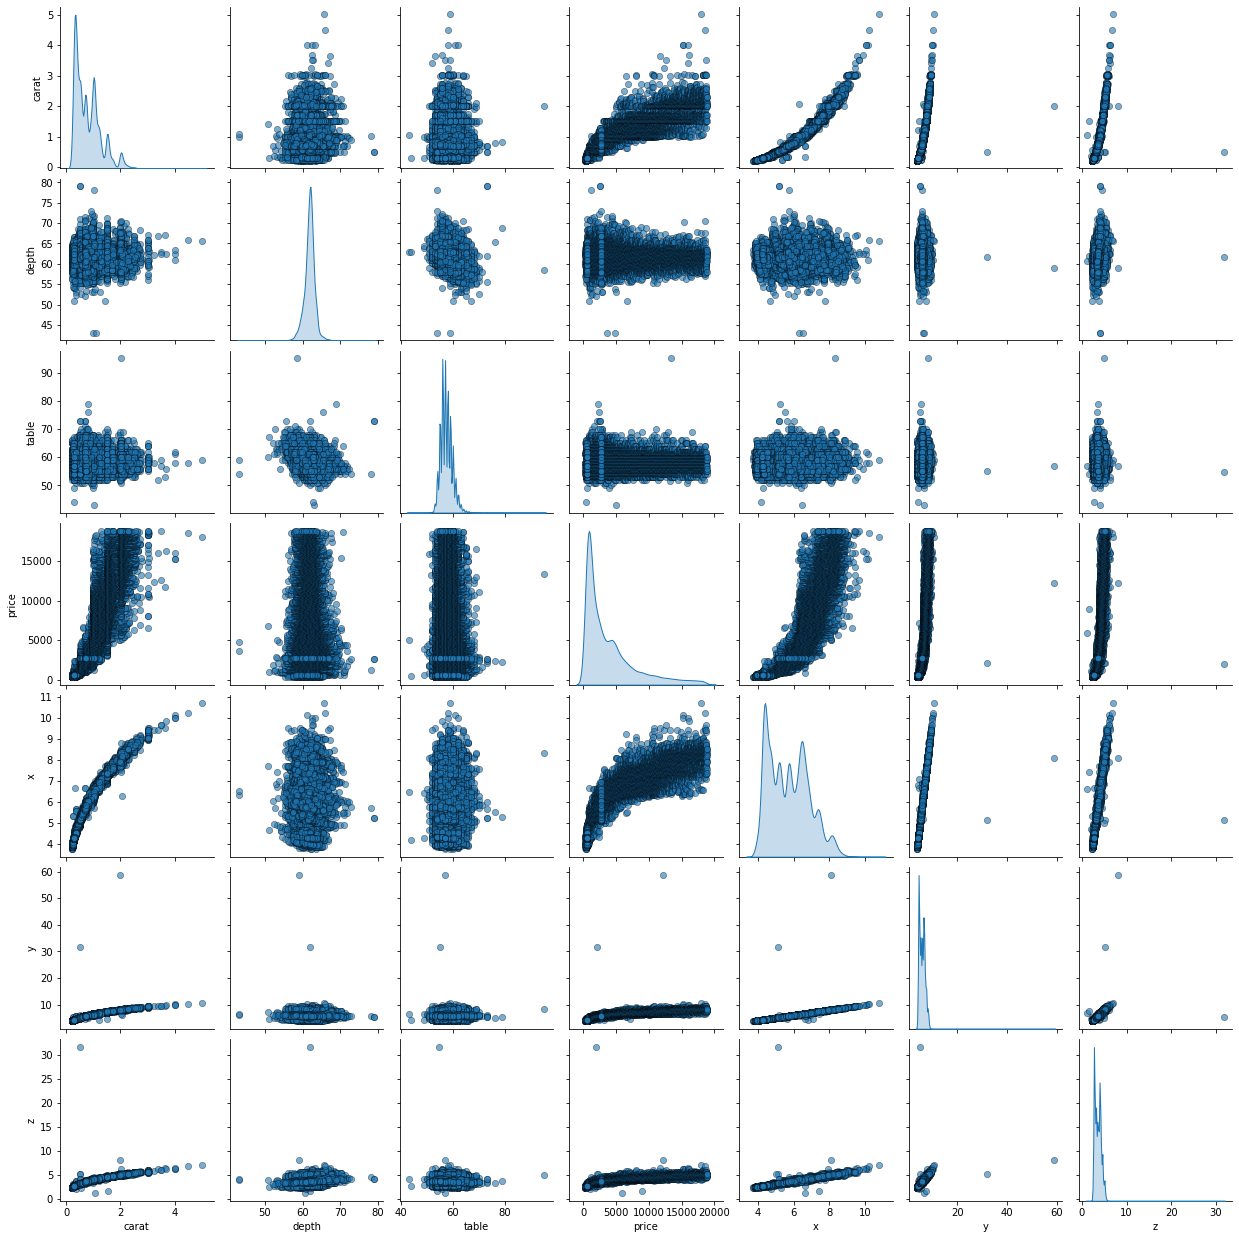

In [16]:
sns.pairplot(
    df_hist, diag_kind="kde", plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"}
);

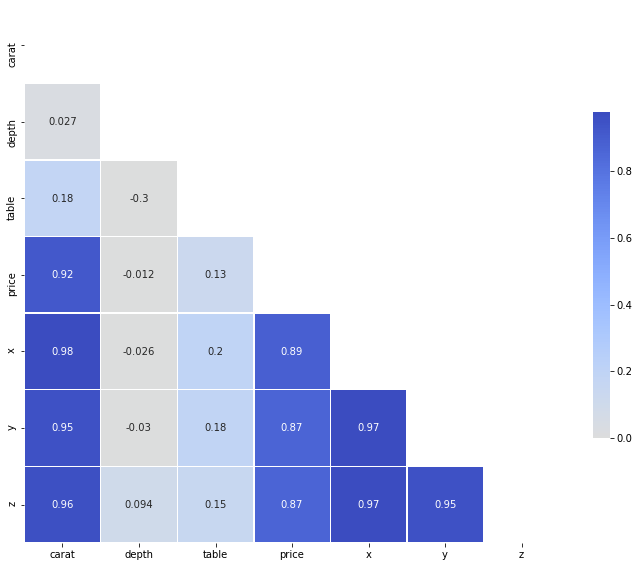

In [17]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm_r",
    vmin=0.0,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
);

### Findings:

* 'Price' is highly correlated to 'Carat'

* 'Price' aslo highly correlated to 'Length (x)', 'Width (y)' and 'Depth (z)'

* 'Price' inversely correlated to 'Depth (z)'

## A deeper look

* ## Correlation 'price' and 'carat'

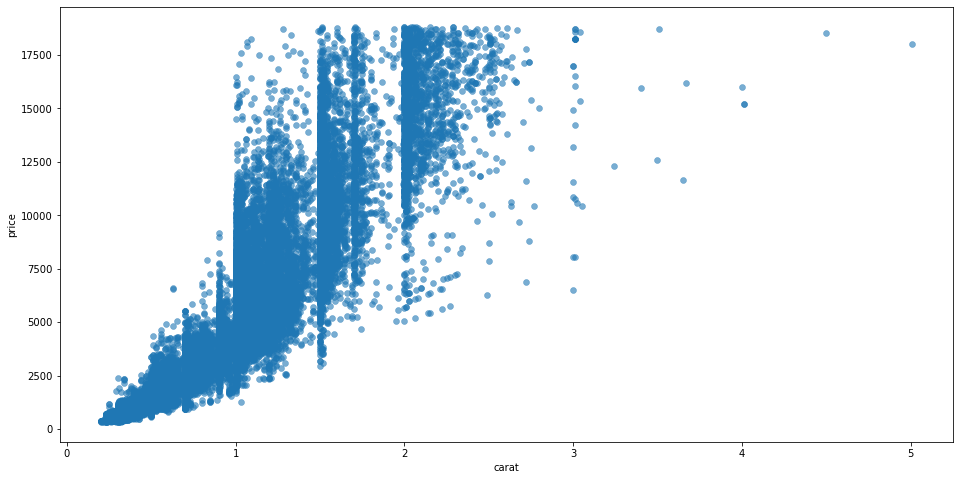

In [18]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x="carat", y="price", edgecolor=None, alpha=0.6);

* ## Correlation 'price' and 'carat' associated to 'color'

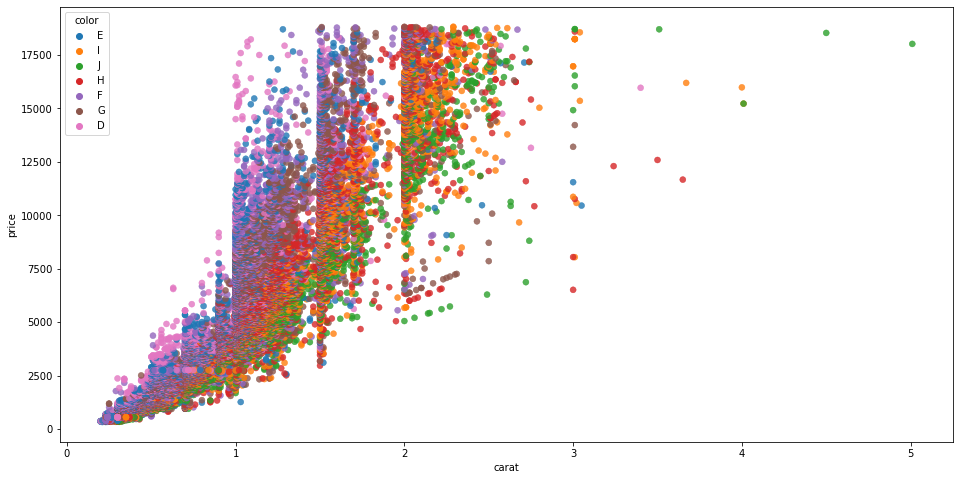

In [19]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat", y="price", hue="color", edgecolor=None, alpha=0.8
);

* ## Correlation 'price' and 'carat' associated to 'clarity'

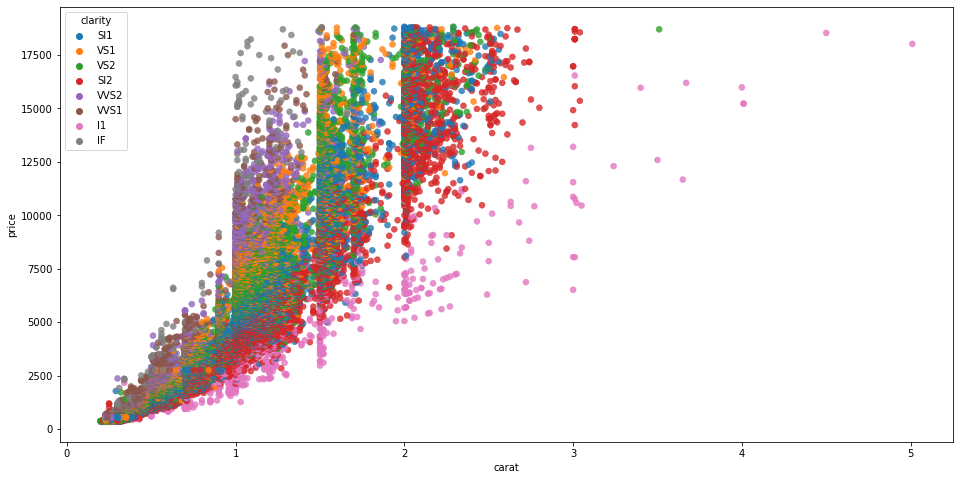

In [20]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat", y="price", hue="clarity", edgecolor=None, alpha=0.8
);

* ## Correlation 'price' and 'carat' associated to 'cut'

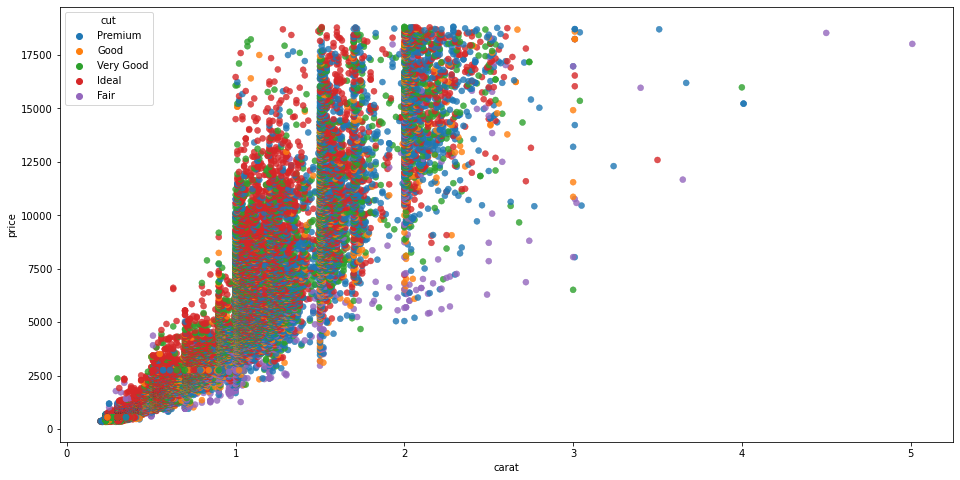

In [21]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat", y="price", hue="cut", edgecolor=None, alpha=0.8
);

## Logarithmic base transformation

In [22]:
df_hist["carat_log"] = np.log(df_hist["carat"])
df_hist["price_log"] = np.log(df_hist["price"])
df_hist

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log,price_log
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,-1.427116,5.817111
...,...,...,...,...,...,...,...,...,...,...,...,...
48917,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,-0.328504,7.921898
48918,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504,7.921898
48919,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504,7.921898
48920,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675,7.921898


* ## Correlation 'price_log' and 'carat_log' associated to 'color'

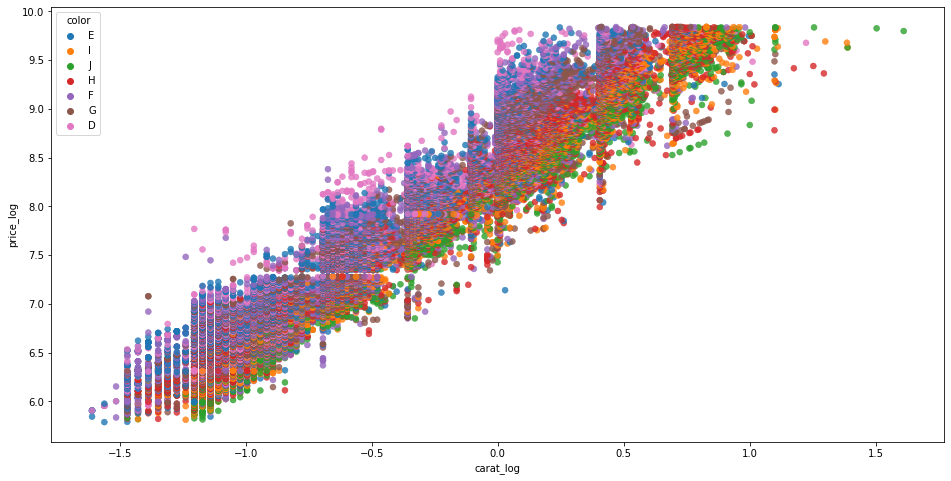

In [23]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat_log", y="price_log", hue="color", edgecolor=None, alpha=0.8
);

* ## Correlation 'price_log' and 'carat_log' associated to 'clarity'

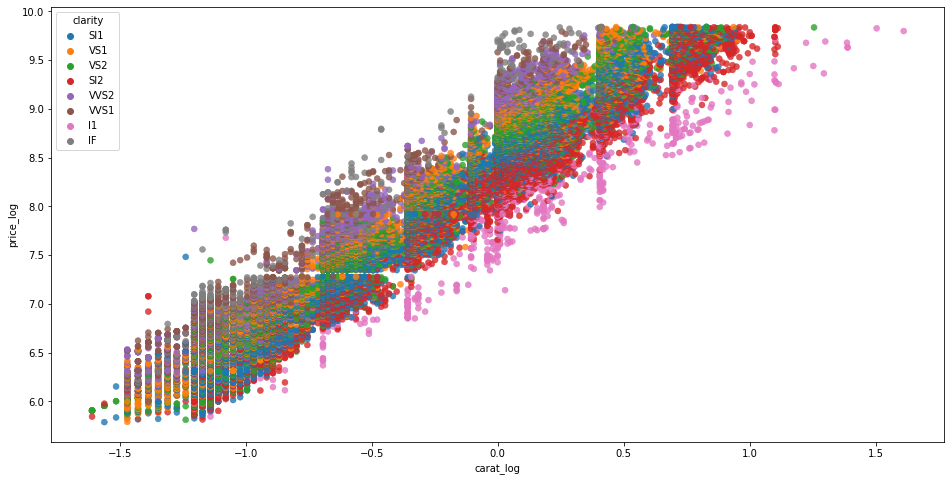

In [24]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat_log", y="price_log", hue="clarity", edgecolor=None, alpha=0.8
);

* ## Correlation 'price_log' and 'carat_log' associated to 'cut'

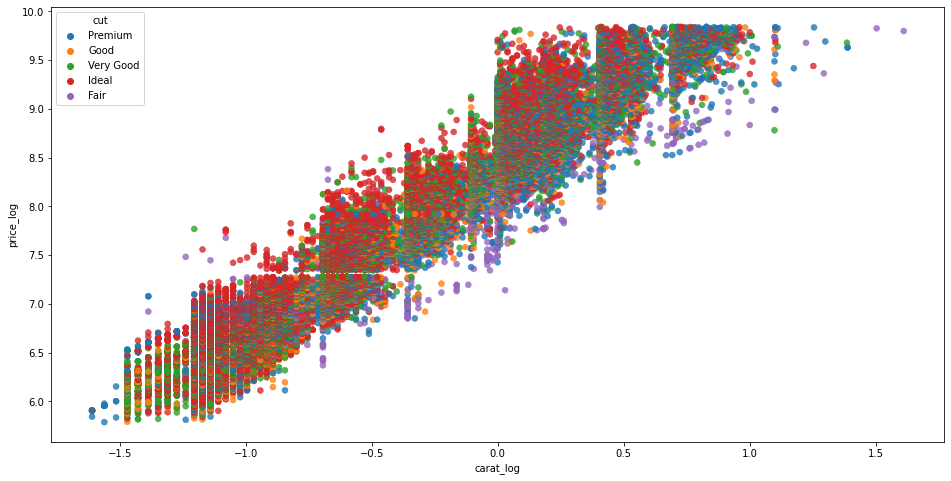

In [25]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist, x="carat_log", y="price_log", hue="cut", edgecolor=None, alpha=0.8
);

## Creating dictionaries with numeric values for categories 'cut', 'color' and 'clarity'

In [26]:
# 'cut' quality range varies from 1 ('Fair') to 5 ('Ideal')
cut_quality = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

# 'color' quality range varies from 1 ('J') to 7 ('D')
color_quality = {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J": 1}

# 'clarity' quality range is from 1 ('I1') to 7 ('IF')
clarity_quality = {
    "I1": 1,
    "SI2": 2,
    "SI1": 3,
    "VS2": 4,
    "VS1": 5,
    "VVS2": 5,
    "VVS1": 6,
    "IF": 7,
}

In [27]:
df_hist["cut_quality"] = df_hist["cut"].apply(lambda x: cut_quality[x])
df_hist["color_quality"] = df_hist["color"].apply(lambda x: color_quality[x])
df_hist["clarity_quality"] = df_hist["clarity"].apply(lambda x: clarity_quality[x])
df_hist

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log,price_log,cut_quality,color_quality,clarity_quality
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897,4,6,3
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960,2,6,5
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,-1.427116,5.817111,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48917,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,-0.328504,7.921898,4,7,3
48918,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504,7.921898,5,7,3
48919,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504,7.921898,2,7,3
48920,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675,7.921898,3,7,3


## Checking the influence of the 'clarity' variable for a specific color 

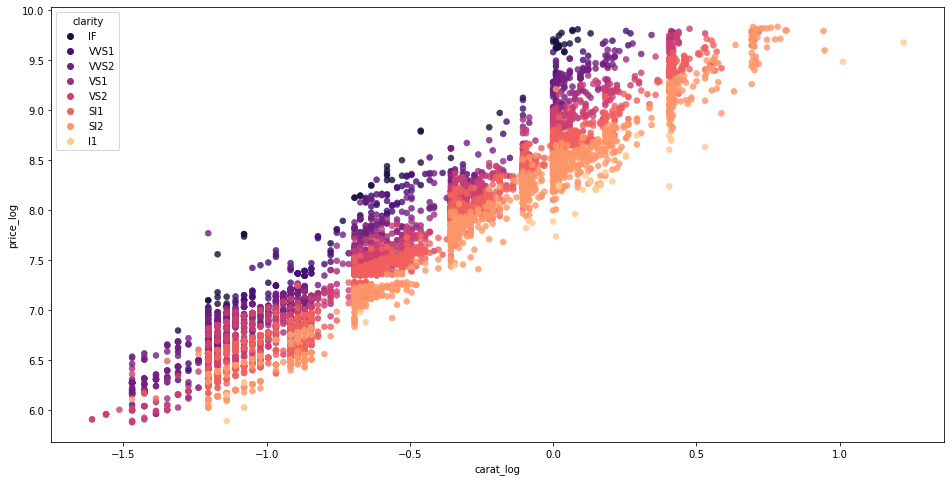

In [28]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist[df_hist["color"] == "D"].sort_values(
        "clarity_quality", ascending=False
    ),
    x="carat_log",
    y="price_log",
    hue="clarity",
    edgecolor=None,
    palette="magma",
    alpha=0.8,
);

# Simple Linear Regression

* without any kind of filter

In [29]:
X = df_hist[["carat"]]  # feature - dataframe format
Y = df_hist["price"]  # target - series format

In [30]:
model = LinearRegression()

In [31]:
model.fit(X, Y)

LinearRegression()

In [32]:
model.coef_

array([7758.52467723])

In [33]:
model.intercept_

-2255.5017549614245

In [34]:
predict_price = model.predict(X)

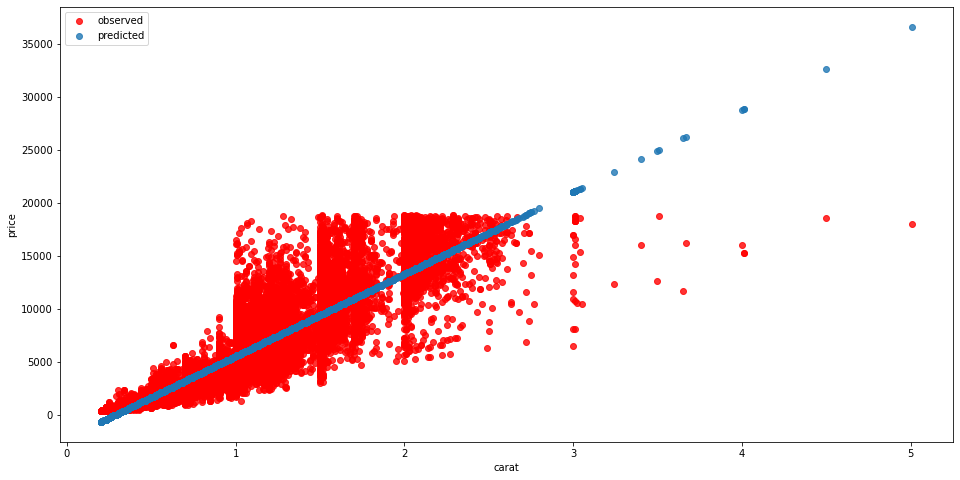

In [35]:
plt.figure(figsize=(16, 8))
plt.xlabel("carat")
plt.ylabel("price")
plt.scatter(X, Y, color="red", label="observed", alpha=0.8)

# plot the predicted values together with the observed values
plt.scatter(X, predict_price, label="predicted", alpha=0.8)
plt.legend();

In [36]:
np.sqrt(mean_squared_error(Y, model.predict(X)))

1541.9947106263855

# A model for all types of color

* a linear regression for each of the colors, using 'carat_log', 'cut_quality' and 'clarity_quality' as the independent variable to find the 'price_log' value.

In [37]:
# sorting out the dataframes for each color

df_hist1 = df_hist[df_hist["color"] == "D"]
df_hist2 = df_hist[df_hist["color"] == "E"]
df_hist3 = df_hist[df_hist["color"] == "F"]
df_hist4 = df_hist[df_hist["color"] == "G"]
df_hist5 = df_hist[df_hist["color"] == "H"]
df_hist6 = df_hist[df_hist["color"] == "I"]
df_hist7 = df_hist[df_hist["color"] == "J"]

## Clustering data in two groups

* Group '0': data below 75%
* Group '1': data above 75%

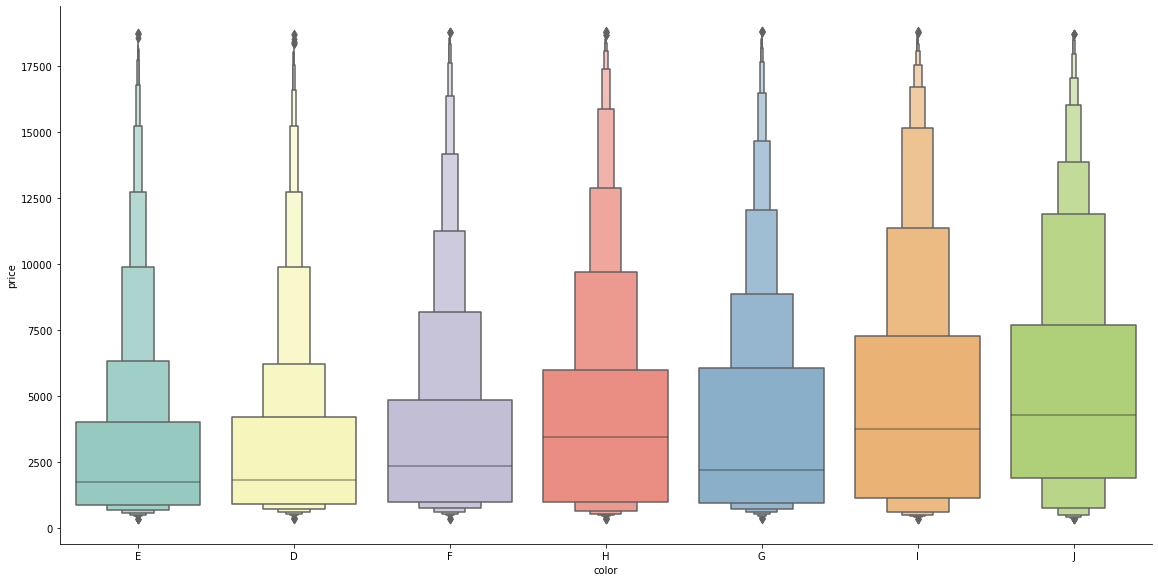

In [38]:
sns.catplot(
    x="color",
    y="price",
    data=df_hist.sort_values("carat"),
    kind="boxen",
    height=8,
    aspect=2,
    palette="Set3",
);

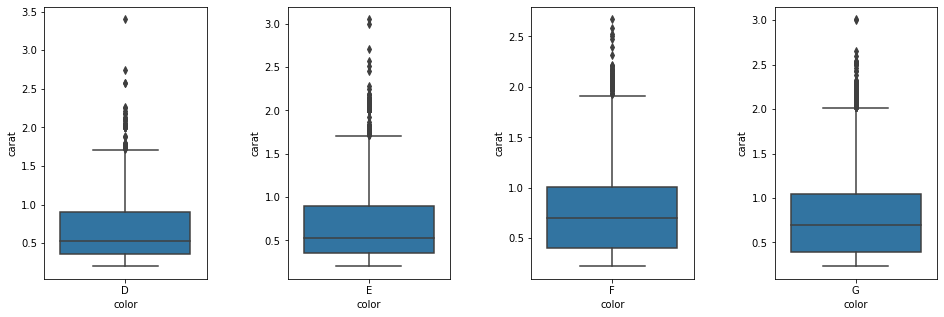

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(16, 5))
sns.boxplot(x=df_hist1.color, y=df_hist1.carat, ax=ax[0])
sns.boxplot(x=df_hist2.color, y=df_hist2.carat, ax=ax[1])
sns.boxplot(x=df_hist3.color, y=df_hist3.carat, ax=ax[2])
sns.boxplot(x=df_hist4.color, y=df_hist4.carat, ax=ax[3])
plt.subplots_adjust(wspace=0.5)

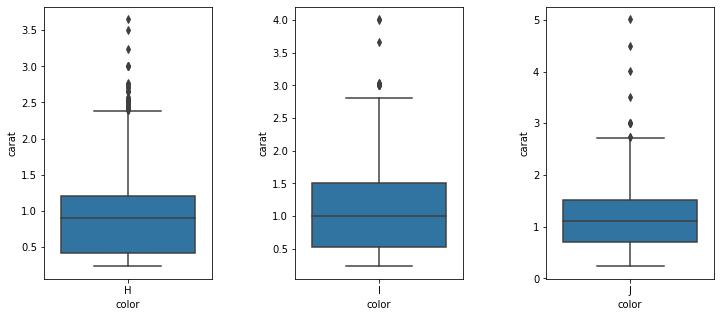

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
sns.boxplot(x=df_hist5.color, y=df_hist5.carat, ax=ax[0])
sns.boxplot(x=df_hist6.color, y=df_hist6.carat, ax=ax[1])
sns.boxplot(x=df_hist7.color, y=df_hist7.carat, ax=ax[2])
plt.subplots_adjust(wspace=0.5)

In [41]:
df_hist1["group"] = df_hist1["carat"].apply(lambda x: 1 if (x <= 0.90) else 0)
df_hist2["group"] = df_hist2["carat"].apply(lambda x: 1 if (x <= 0.90) else 0)
df_hist3["group"] = df_hist3["carat"].apply(lambda x: 1 if (x <= 1.1) else 0)
df_hist4["group"] = df_hist4["carat"].apply(lambda x: 1 if (x <= 1.04) else 0)
df_hist5["group"] = df_hist5["carat"].apply(lambda x: 1 if (x <= 1.20) else 0)
df_hist6["group"] = df_hist6["carat"].apply(lambda x: 1 if (x <= 1.50) else 0)
df_hist7["group"] = df_hist7["carat"].apply(lambda x: 1 if (x <= 1.52) else 0)

<ipython-input-41-7a834b382180>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist1["group"] = df_hist1["carat"].apply(lambda x: 1 if (x <= 0.90) else 0)
<ipython-input-41-7a834b382180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist2["group"] = df_hist2["carat"].apply(lambda x: 1 if (x <= 0.90) else 0)
<ipython-input-41-7a834b382180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [42]:
# X and Y values of each dataframe

X1 = df_hist1[["carat_log", "cut_quality", "clarity_quality", "group"]]
Y1 = df_hist1["price_log"]

X2 = df_hist2[["carat_log", "cut_quality", "clarity_quality", "group"]]
Y2 = df_hist2["price_log"]

X3 = df_hist3[["carat_log", "cut_quality", "clarity_quality", "group"]]
Y3 = df_hist3["price_log"]

X4 = df_hist4[["carat_log", "cut_quality", "clarity_quality", "group"]]
Y4 = df_hist4["price_log"]

X5 = df_hist5[["carat_log", "cut_quality", "clarity_quality", "group"]]
Y5 = df_hist5["price_log"]

X6 = df_hist6[["carat_log", "cut_quality", "clarity_quality", "group"]]
Y6 = df_hist6["price_log"]

X7 = df_hist7[["carat_log", "cut_quality", "clarity_quality", "group"]]
Y7 = df_hist7["price_log"]

In [43]:
df_hist1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log,price_log,cut_quality,color_quality,clarity_quality,group
26,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40,-1.469676,5.877736,3,7,4,1
32,0.23,Very Good,D,VS1,61.9,58.0,402,3.92,3.96,2.44,-1.469676,5.996452,3,7,5,1
36,0.26,Very Good,D,VS2,60.8,59.0,403,4.13,4.16,2.52,-1.347074,5.998937,3,7,4,1
40,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61,-1.347074,5.998937,2,7,4,1
41,0.26,Good,D,VS1,58.4,63.0,403,4.19,4.24,2.46,-1.347074,5.998937,2,7,5,1


In [44]:
# multivariable regression
# independent variables: 'carat_log', 'cut_quality' and 'clarity_quality'

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()
model7 = LinearRegression()

model1.fit(X1, Y1)
model2.fit(X2, Y2)
model3.fit(X3, Y3)
model4.fit(X4, Y4)
model5.fit(X5, Y5)
model6.fit(X6, Y6)
model7.fit(X7, Y7)

LinearRegression()

In [45]:
model1.coef_[1]

0.03741618931186438

In [46]:
model1.coef_

array([ 1.80949122,  0.03741619,  0.17946102, -0.11850525])

In [47]:
# estimated price calculation and transforming the calculated value from 'price_log' to 'price'
df_hist1["predict_price"] = np.exp(model1.predict(X1))
df_hist2["predict_price"] = np.exp(model2.predict(X2))
df_hist3["predict_price"] = np.exp(model3.predict(X3))
df_hist4["predict_price"] = np.exp(model4.predict(X4))
df_hist5["predict_price"] = np.exp(model5.predict(X5))
df_hist6["predict_price"] = np.exp(model6.predict(X6))
df_hist7["predict_price"] = np.exp(model7.predict(X7))

<ipython-input-47-562748f7707c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist1["predict_price"] = np.exp(model1.predict(X1))
<ipython-input-47-562748f7707c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist2["predict_price"] = np.exp(model2.predict(X2))
<ipython-input-47-562748f7707c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

## Single calculation of the Root Mean Squared Error (RMSE) for every Model

In [48]:
np.sqrt(mean_squared_error(df_hist1["price"], df_hist1["predict_price"]))

712.7714712158312

In [49]:
np.sqrt(mean_squared_error(df_hist2["price"], df_hist2["predict_price"]))

646.7574430824504

In [50]:
np.sqrt(mean_squared_error(df_hist3["price"], df_hist3["predict_price"]))

709.4859922479917

In [51]:
np.sqrt(mean_squared_error(df_hist4["price"], df_hist4["predict_price"]))

793.6315725269318

In [52]:
np.sqrt(mean_squared_error(df_hist5["price"], df_hist5["predict_price"]))

1007.6444641420675

In [53]:
np.sqrt(mean_squared_error(df_hist6["price"], df_hist6["predict_price"]))

1092.4549736186

In [54]:
np.sqrt(mean_squared_error(df_hist7["price"], df_hist7["predict_price"]))

1200.6761130680432

## Findings

* Models 5, 6 and 7 resulted in a RMSE above 1000

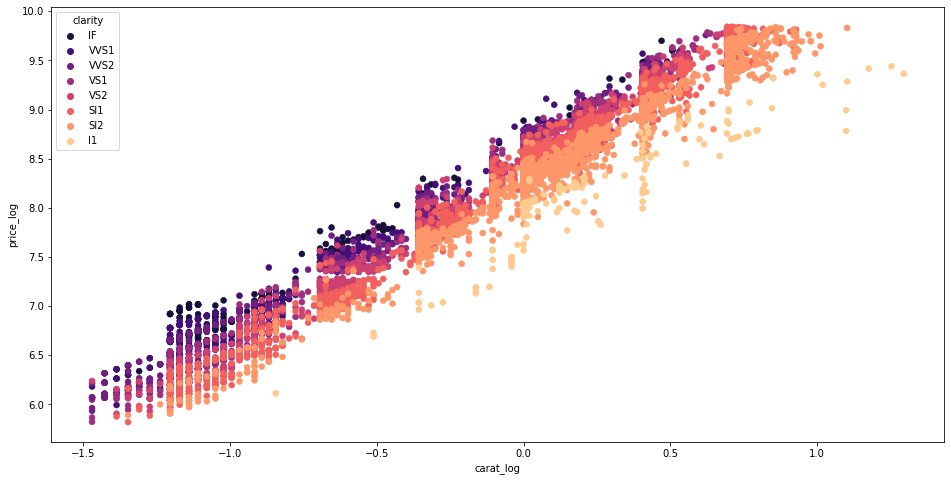

In [55]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist5.sort_values("clarity_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="clarity",
    edgecolor=None,
    palette="magma",
);

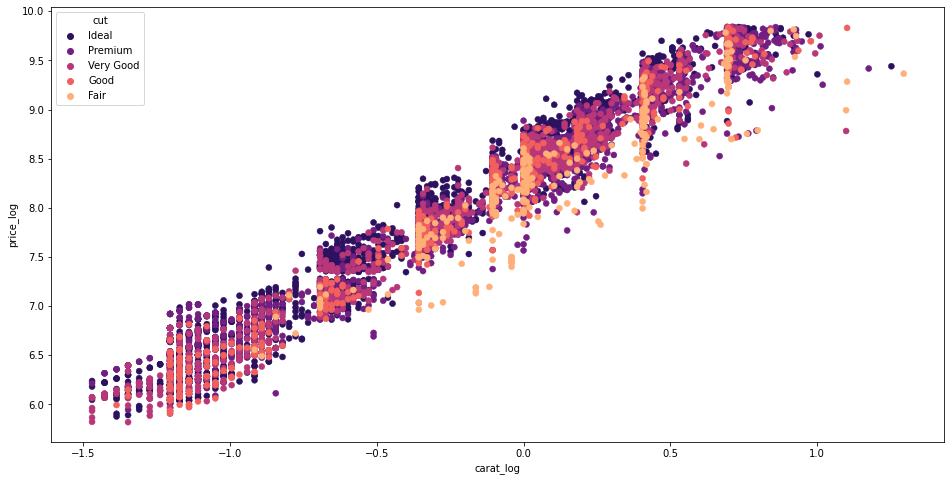

In [56]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist5.sort_values("cut_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="cut",
    edgecolor=None,
    palette="magma",
);

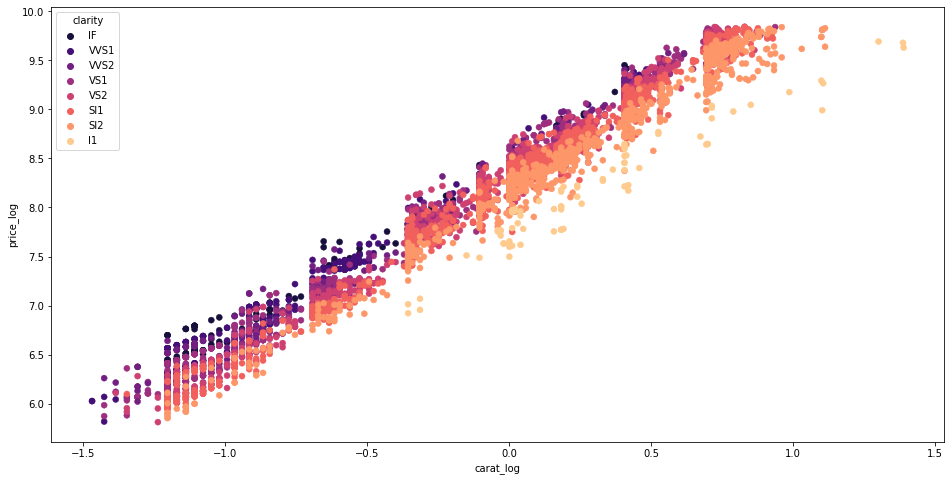

In [57]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist6.sort_values("clarity_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="clarity",
    edgecolor=None,
    palette="magma",
);

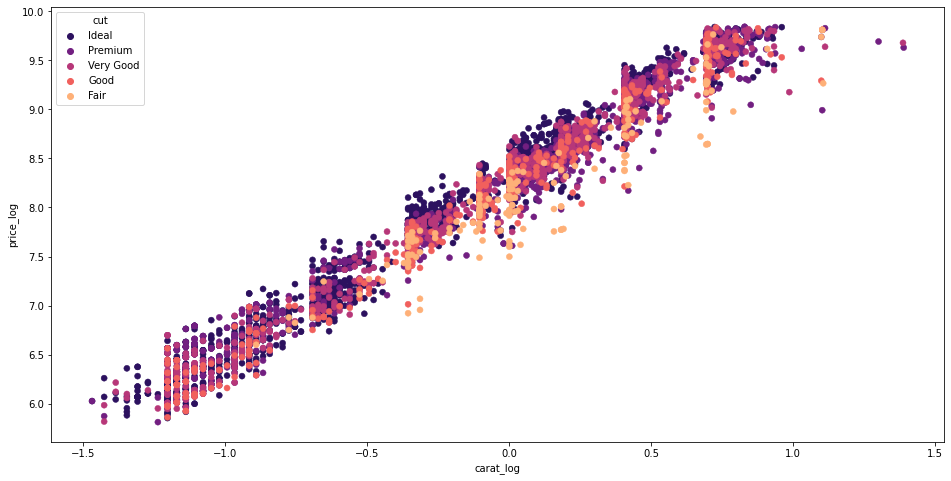

In [58]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist6.sort_values("cut_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="cut",
    edgecolor=None,
    palette="magma",
);

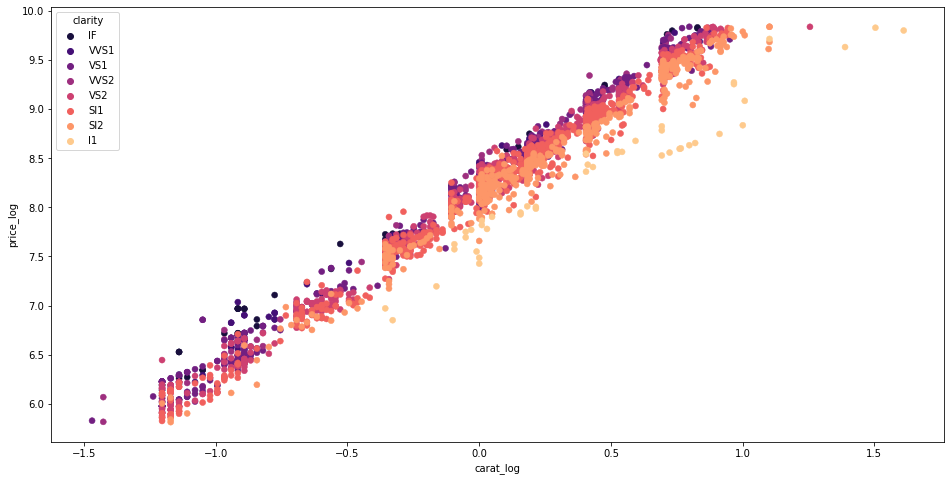

In [59]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist7.sort_values("clarity_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="clarity",
    edgecolor=None,
    palette="magma",
);

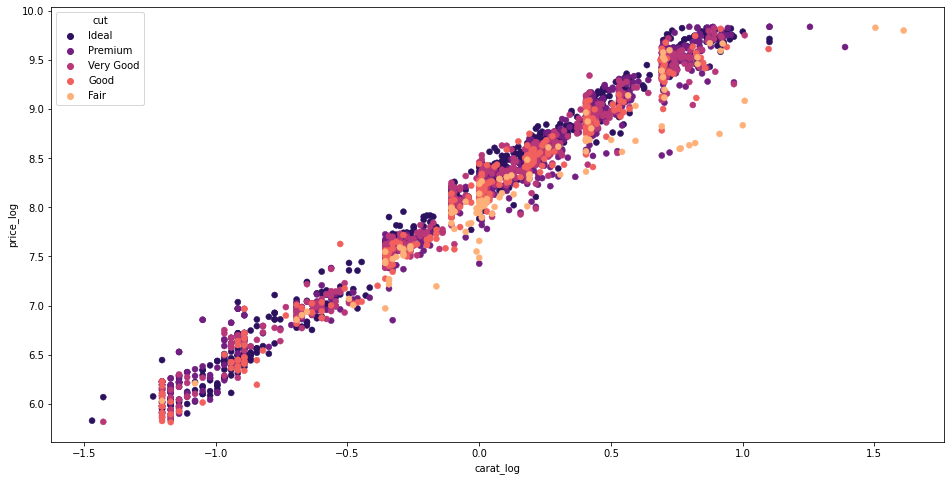

In [60]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_hist7.sort_values("cut_quality", ascending=False),
    x="carat_log",
    y="price_log",
    hue="cut",
    edgecolor=None,
    palette="magma",
);

In [61]:
# concatenating the models into one dataframe

df_hist_all = pd.concat(
    [df_hist1, df_hist2, df_hist3, df_hist4, df_hist5, df_hist6, df_hist7]
)
df_hist_all

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log,price_log,cut_quality,color_quality,clarity_quality,group,predict_price
26,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40,-1.469676,5.877736,3,7,4,1,392.121935
32,0.23,Very Good,D,VS1,61.9,58.0,402,3.92,3.96,2.44,-1.469676,5.996452,3,7,5,1,469.202228
36,0.26,Very Good,D,VS2,60.8,59.0,403,4.13,4.16,2.52,-1.347074,5.998937,3,7,4,1,489.517727
40,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61,-1.347074,5.998937,2,7,4,1,471.540260
41,0.26,Good,D,VS1,58.4,63.0,403,4.19,4.24,2.46,-1.347074,5.998937,2,7,5,1,564.231993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48698,0.90,Premium,J,SI2,63.0,59.0,2717,6.14,6.11,3.86,-0.105361,7.907284,4,1,2,1,2534.994770
48782,0.90,Good,J,SI1,63.2,60.0,2729,6.09,6.12,3.86,-0.105361,7.911691,2,1,3,1,2598.949881
48837,0.82,Ideal,J,VS2,61.6,56.0,2741,6.00,6.04,3.71,-0.198451,7.916078,5,1,4,1,2570.659148
48840,0.83,Ideal,J,VS2,62.3,55.0,2742,6.01,6.03,3.75,-0.186330,7.916443,5,1,4,1,2628.639103


## Calculation of the Root Mean Squared Error (RMSE) for all dataset

In [62]:
np.sqrt(mean_squared_error(df_hist_all["price"], df_hist_all["predict_price"]))

843.5884391774468

# Applying our model to Rick's dataset

In [63]:
# reading rick_diamonds .csv file and transform into a data frame
df_rick = pd.read_csv("data/rick_diamonds.csv", sep=",")
df_rick

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71


In [64]:
# creating independent quality variables used in the model
df_rick["cut_quality"] = df_rick["cut"].apply(lambda x: cut_quality[x])
df_rick["color_quality"] = df_rick["color"].apply(lambda x: color_quality[x])
df_rick["clarity_quality"] = df_rick["clarity"].apply(lambda x: clarity_quality[x])
df_rick["carat_log"] = np.log(df_rick["carat"])
df_rick

,carat,cut,color,clarity,depth,table,x,y,z,cut_quality,color_quality,clarity_quality,carat_log
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2,-0.094311
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4,-0.967584
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4,-0.653926
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5,0.095310
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2,0.824175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7,2,-1.203973
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,5,-0.673345
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3,0.009950
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5,6,-1.171183


In [65]:
# partitioning dataset according to diamond's color
df_rick1 = df_rick[df_rick["color"] == "D"]
df_rick2 = df_rick[df_rick["color"] == "E"]
df_rick3 = df_rick[df_rick["color"] == "F"]
df_rick4 = df_rick[df_rick["color"] == "G"]
df_rick5 = df_rick[df_rick["color"] == "H"]
df_rick6 = df_rick[df_rick["color"] == "I"]
df_rick7 = df_rick[df_rick["color"] == "J"]

In [66]:
# clustering in two groups
df_rick1["group"] = df_rick1["carat"].apply(lambda x: 1 if (x <= 0.90) else 0)
df_rick2["group"] = df_rick2["carat"].apply(lambda x: 1 if (x <= 0.90) else 0)
df_rick3["group"] = df_rick3["carat"].apply(lambda x: 1 if (x <= 1.1) else 0)
df_rick4["group"] = df_rick4["carat"].apply(lambda x: 1 if (x <= 1.04) else 0)
df_rick5["group"] = df_rick5["carat"].apply(lambda x: 1 if (x <= 1.20) else 0)
df_rick6["group"] = df_rick6["carat"].apply(lambda x: 1 if (x <= 1.50) else 0)
df_rick7["group"] = df_rick7["carat"].apply(lambda x: 1 if (x <= 1.52) else 0)

<ipython-input-66-483deae9c201>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rick1["group"] = df_rick1["carat"].apply(lambda x: 1 if (x <= 0.90) else 0)
<ipython-input-66-483deae9c201>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rick2["group"] = df_rick2["carat"].apply(lambda x: 1 if (x <= 0.90) else 0)
<ipython-input-66-483deae9c201>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [67]:
# separating the inputs to calculate the price
x1 = df_rick1[["carat_log", "cut_quality", "clarity_quality", "group"]]
x2 = df_rick2[["carat_log", "cut_quality", "clarity_quality", "group"]]
x3 = df_rick3[["carat_log", "cut_quality", "clarity_quality", "group"]]
x4 = df_rick4[["carat_log", "cut_quality", "clarity_quality", "group"]]
x5 = df_rick5[["carat_log", "cut_quality", "clarity_quality", "group"]]
x6 = df_rick6[["carat_log", "cut_quality", "clarity_quality", "group"]]
x7 = df_rick7[["carat_log", "cut_quality", "clarity_quality", "group"]]

In [68]:
# calculating the price
df_rick1["price_predicted"] = np.exp(model1.predict(x1))
df_rick2["price_predicted"] = np.exp(model2.predict(x2))
df_rick3["price_predicted"] = np.exp(model3.predict(x3))
df_rick4["price_predicted"] = np.exp(model4.predict(x4))
df_rick5["price_predicted"] = np.exp(model5.predict(x5))
df_rick6["price_predicted"] = np.exp(model6.predict(x6))
df_rick7["price_predicted"] = np.exp(model7.predict(x7))

<ipython-input-68-fbf0c1c0a015>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rick1["price_predicted"] = np.exp(model1.predict(x1))
<ipython-input-68-fbf0c1c0a015>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rick2["price_predicted"] = np.exp(model2.predict(x2))
<ipython-input-68-fbf0c1c0a015>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [69]:
# concatenating the models into one dataframe
df_rick_all = pd.concat(
    [df_rick1, df_rick2, df_rick3, df_rick4, df_rick5, df_rick6, df_rick7]
)
df_rick_all

,carat,cut,color,clarity,depth,table,x,y,z,cut_quality,color_quality,clarity_quality,carat_log,group,price_predicted
10,1.00,Good,D,VS2,64.1,58.0,6.24,6.33,4.03,2,7,4,0.000000,0,6075.549253
13,0.33,Ideal,D,VS2,61.9,53.0,4.49,4.46,2.77,5,7,4,-1.108663,1,812.126168
14,0.51,Fair,D,VS2,64.4,54.0,5.06,5.03,3.25,1,7,4,-0.673345,1,1537.165134
24,1.26,Premium,D,SI2,61.9,58.0,6.88,6.81,4.24,4,7,2,0.231112,0,6947.468672
28,0.41,Premium,D,VVS2,62.2,58.0,4.80,4.78,2.98,4,7,5,-0.891598,1,1386.415405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,1.00,Fair,J,SI2,56.3,64.0,6.58,6.54,3.69,1,1,2,0.000000,1,2837.156215
4946,0.91,Good,J,VS2,61.3,61.0,6.18,6.25,3.81,2,1,4,-0.094311,1,2870.618909
4967,1.00,Ideal,J,SI1,59.2,62.0,6.47,6.50,3.84,5,1,3,0.000000,1,3422.030867
4973,1.21,Ideal,J,SI1,61.9,54.0,6.85,6.88,4.25,5,1,3,0.190620,1,4859.741805


In [70]:
# sorting the index
df_rick_all.sort_index(inplace=True)
df_rick_all

,carat,cut,color,clarity,depth,table,x,y,z,cut_quality,color_quality,clarity_quality,carat_log,group,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2,-0.094311,1,2996.710771
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4,-0.967584,1,831.178332
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4,-0.653926,1,1443.147333
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5,0.095310,0,7514.509470
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2,0.824175,0,18919.137684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7,2,-1.203973,1,442.941791
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,5,-0.673345,1,1896.000635
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3,0.009950,1,4713.698630
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5,6,-1.171183,1,864.165910


In [71]:
# droping columns to match file submission standards
df_rick_all.drop(
    columns=["carat_log", "cut_quality", "clarity_quality", "color_quality"],
    inplace=True,
)
df_rick_all

,carat,cut,color,clarity,depth,table,x,y,z,group,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,1,2996.710771
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,1,831.178332
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1,1443.147333
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,0,7514.509470
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,0,18919.137684
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,1,442.941791
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,1,1896.000635
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,1,4713.698630
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,1,864.165910


In [72]:
# exporting dataset to .csv file
df_rick_all.to_csv("final_csv/Rick_Predicted_01_B.csv", sep=",")

In [73]:
# uploading .csv to calculate RMSE

![img](./images/Rick_Predicted_01_B.png)

# RMSE for Rick's diamonds:

# 967.38 dollars